**Students Performance in Exam**

**Latar Belakang Dataset**

kemampuan siswa dalam membaca, menulis, dan berhitung sangat rendah. Hal ini bisa dilihat dari hasil ujian siswa. Keberhasilan pembelajaran calistung di kelas juga tak lepas dari bagaimana seorang guru menyampaikan materi dengan baik dan dapat dipahami oleh siswa, seperti kemampuan guru diawal pembelajaran, dalam pelaksanaannya dan diakhir pembelajaran, bagaimana seorang guru mampu melakukan itu dengan baik. tidak hanya guru yang paling berperan banyak faktor yang mempengaruhi kinerja siswa seperti, gender, pendidikan orang tua, dan nutrisi yang cukup sebelum melakukan ujian

**Pertanyaan Analisis**



1.   bandingkan kemampuan kinerja siswa berdasarkan gender pada masing-masing bidang?
2.   Apakah tingkat pendidikan orangtua mempengaruhi kinerja/kemampuan siswa?
3.   Apakah penting melakukan pre test sebelum diadakan ujian?
4.   Bandingkan skor siswa yang makan sebelum ujian sama yang makan





**EDA (Exploratory Data Analysis)**

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt 
import os 
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [5]:
data = pd.read_csv('/content/StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
data.rename(columns={"race/ethnicity":"ethnicity","parental level of education":"parent_education"
                    ,"math score":"math","reading score":"reading","writing score":"writing",
                    "test preparation course":"pre"},inplace=True)
data.head()

,gender,ethnicity,parent_education,lunch,pre,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
data.dtypes

gender              object
ethnicity           object
parent_education    object
lunch               object
pre                 object
math                 int64
reading              int64
writing              int64
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


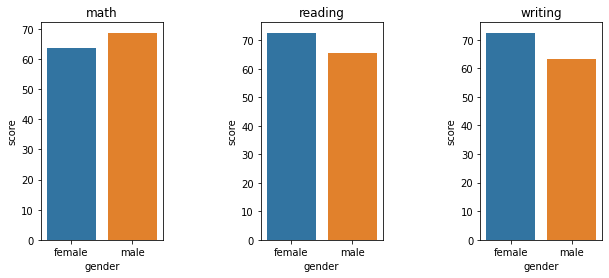

In [8]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    gender_df = data.groupby("gender")[list(data.columns[-3:])[idx]].describe()
    sns.barplot(gender_df.index, gender_df.loc[:,"mean"].values)
    plt.ylabel("score")
    plt.title(list(data.columns[-3:])[idx])
    
plt.show()

Kita dapat melihat bahwa laki-laki memiliki kinerja yang lebih baik di bidang matematika, tetapi lebih buruk dalam membaca dan menulis.

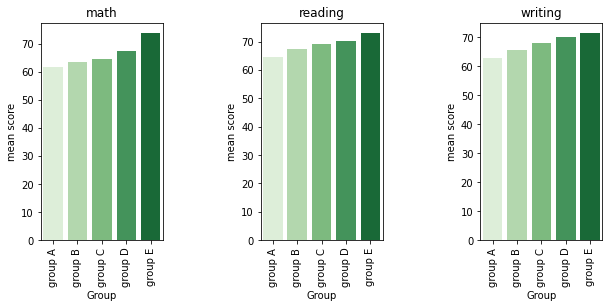

In [9]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    ethn_df = data.groupby("ethnicity")[list(data.columns[-3:])[idx]].mean()
    sns.barplot(x=ethn_df.index, y = ethn_df.values, palette = "Greens")
    plt.xlabel("Group")
    plt.ylabel("mean score")
    plt.xticks(rotation=90)
    plt.title(list(data.columns[-3:])[idx])
plt.show()

Jelas, grup E memiliki performa terbaik untuk semua bidang, dan grup A adalah yang terburuk

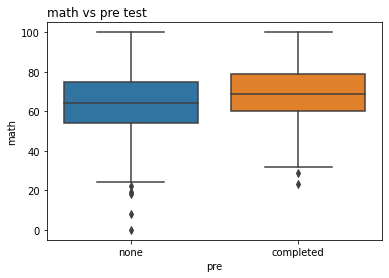

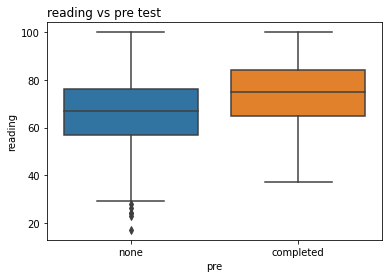

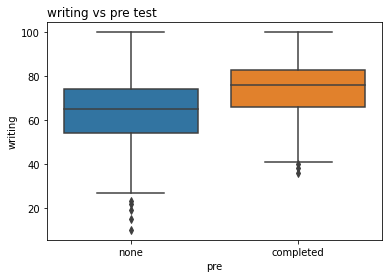

In [10]:
for item in data.columns[-3:]:
    sns.boxplot(x=data["pre"], y=data[item])
    plt.title(item+" vs pre test", loc="left")
    plt.show()

skor semakin sempit jika siswa menyelesaikan persiapan sebelum ujian, dan juga kita dapat melihat bahwa rata-rata skornya lebih baik.

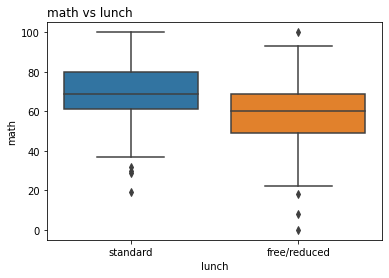

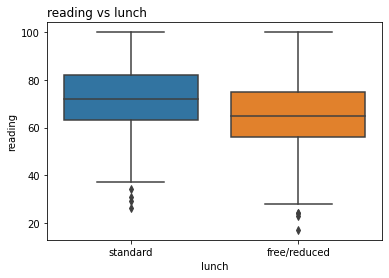

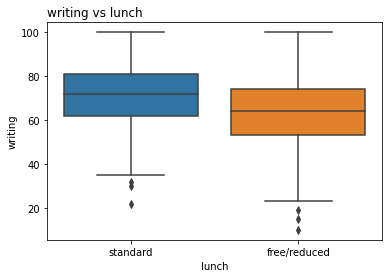

In [11]:
for item in data.columns[-3:]:
    sns.boxplot(x=data["lunch"], y=data[item])
    plt.title(item+" vs lunch", loc="left")
    plt.show()

Masuk akal! Siswa lebih mudah mendapatkan nilai yang lebih baik setelah mereka makan 

**Data Preparation**

Kami memeriksa tipe data lebih awal. Kemudian kami mengubah beberapa fitur dengan label encoder.

In [12]:
labelencoder = LabelEncoder()
train_df = data.copy()
train_df["parent_education"] = labelencoder.fit_transform(train_df["parent_education"])
train_df["pre"] = labelencoder.fit_transform(train_df["pre"])
train_df["lunch"] = labelencoder.fit_transform(train_df["lunch"])
train_df.head()

,gender,ethnicity,parent_education,lunch,pre,math,reading,writing
0,female,group B,1,1,1,72,72,74
1,female,group C,4,1,0,69,90,88
2,female,group B,3,1,1,90,95,93
3,male,group A,0,0,1,47,57,44
4,male,group C,4,1,1,76,78,75


Fitur "parent_education", "lunch" dan "pre" diberi label dengan angka. Selanjutnya, kami menggunakan argorithm KMeans untuk mengklasifikasikan dataset.

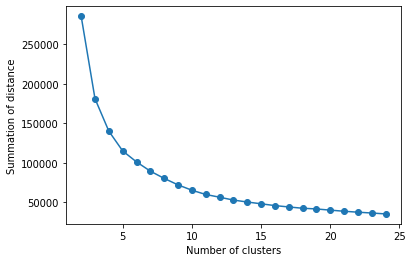

In [13]:
kmeans_dis = list()
for idx in range(2, 25):  
    kmeans = KMeans(init = "k-means++", n_clusters = idx, n_init = 20)
    kmeans.fit_transform(train_df.iloc[:, 2:])
    kmeans_dis.append(kmeans.inertia_)
plt.plot(list(range(2,25)), kmeans_dis, marker = "o")
plt.xlabel("Number of clusters")
plt.ylabel("Summation of distance")
plt.show()

In [15]:
kmeans = KMeans(init = "k-means++", n_clusters = 8)
kmeans.fit_transform(train_df.iloc[:, 2:])
kmeans_label = kmeans.labels_
data["classification"] = kmeans_label
data.head(10)

,gender,ethnicity,parent_education,lunch,pre,math,reading,writing,classification
0,female,group B,bachelor's degree,standard,none,72,72,74,5
1,female,group C,some college,standard,completed,69,90,88,6
2,female,group B,master's degree,standard,none,90,95,93,4
3,male,group A,associate's degree,free/reduced,none,47,57,44,7
4,male,group C,some college,standard,none,76,78,75,6
5,female,group B,associate's degree,standard,none,71,83,78,6
6,female,group B,some college,standard,completed,88,95,92,4
7,male,group B,some college,free/reduced,none,40,43,39,0
8,male,group D,high school,free/reduced,completed,64,64,67,2
9,female,group B,high school,free/reduced,none,38,60,50,7


mari kita lihat performa masing-masing cluster.

In [17]:
class_df = data.groupby("classification")[data.columns[-4:-1]].mean()
class_df

,math,reading,writing
classification,,,
0,32.135135,35.972973,33.594595
1,82.804196,82.104895,80.636364
2,57.841772,67.411392,67.582278
3,60.455224,57.716418,55.850746
4,88.282609,93.097826,93.163043
5,73.198582,68.723404,67.063830
6,68.456250,78.187500,77.900000
7,47.577778,51.459259,49.088889


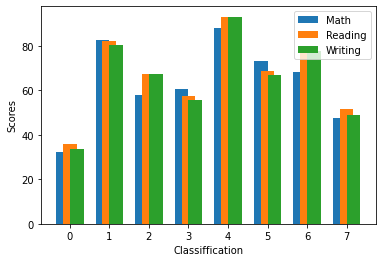

In [18]:
ind = np.arange(8)
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, class_df.math, width, label='Math')
rects2 = ax.bar(ind, class_df.reading, width, label='Reading')
rects3 = ax.bar(ind + width/2, class_df.writing, width, label='Writing')

ax.set_xlabel('Classiffication')
ax.set_ylabel('Scores')
ax.set_xticks(ind)
ax.legend()
plt.show()

Sampai sekarang, jelas bahwa semua subjek cluster memiliki tren yang sama, jadi kami memilih rata-rata semua objek untuk menentukan peringkat cluster

In [19]:
class_df["total_ave_score"] = (class_df.math + class_df.reading + class_df.writing)/3
rank = class_df["total_ave_score"].sort_values(ascending = False)
rank.index

Int64Index([4, 1, 6, 5, 2, 3, 7, 0], dtype='int64', name='classification')

In [20]:
rank

classification
4    91.514493
1    81.848485
6    74.847917
5    69.661939
2    64.278481
3    58.007463
7    49.375309
0    33.900901
Name: total_ave_score, dtype: float64

Untuk peringkat 5 besar, skor rata-rata semua lulus, Peringkat 0 adalah cluster terbaik, Peringkat 1 adalah yang kedua dan seterusnya.

**Visualisasi Data**

sekarang, kita bisa mengetahui korelasi antara kinerja siswa dan fitur. Mari kita plot pie chart untuk melihat apakah tingkat pendidikan orang tua dapat mempengaruhi kinerja atau tidak.

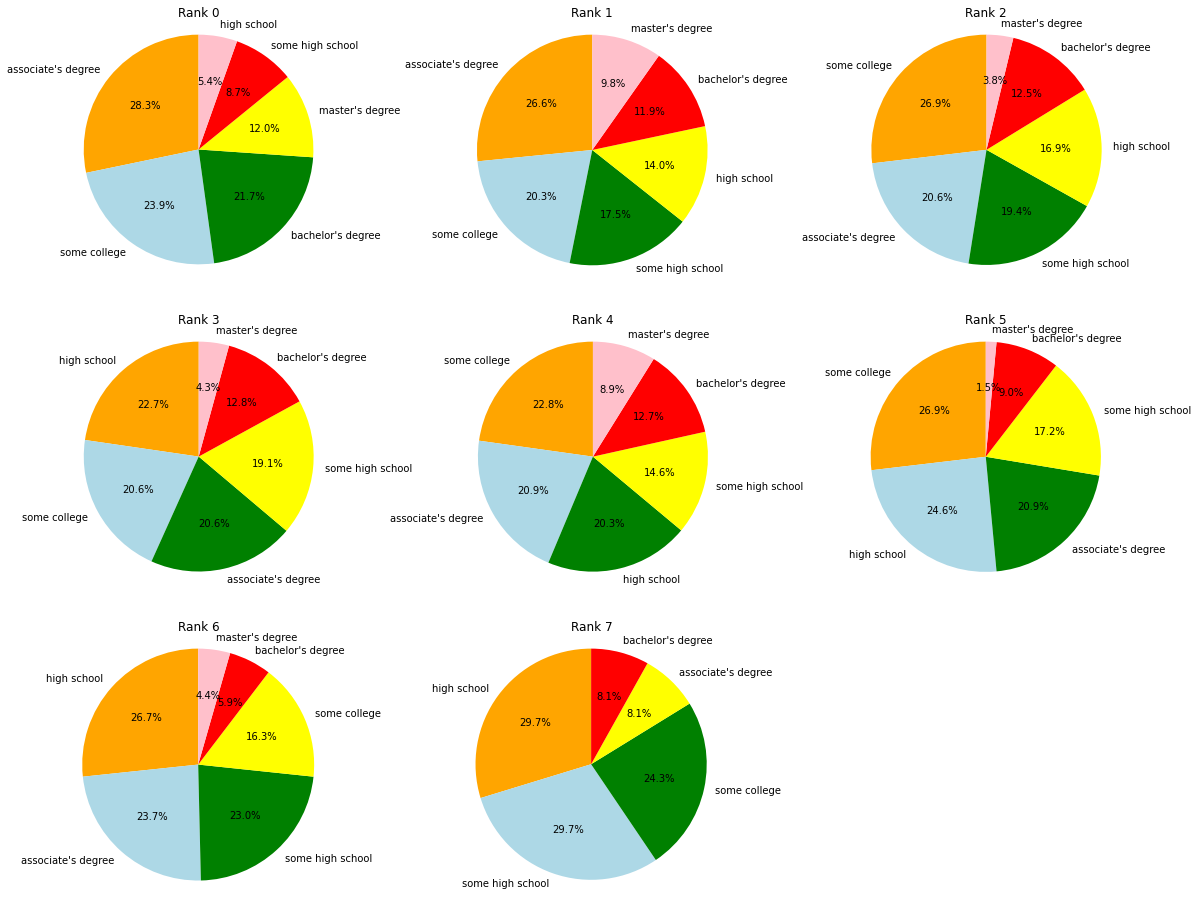

In [21]:
def plot_pie_chart(column):
    fig, ax = plt.subplots(figsize=(20,16))
    color = ["orange","lightblue","green","yellow","red","pink","brown","gray"]
    for idx in range(8):
        plt.subplot(3, 3, idx+1)
        num = "class"+ str(idx)
        num = data[data["classification"]==rank.index[idx]]
        percentage_of_parent_edu = num[column].value_counts()
        percentage_of_parent_edu.sort_index()
        label = percentage_of_parent_edu.index
        value = percentage_of_parent_edu.values
        plt.pie(value, labels = label, autopct = "%1.1f%%",
                startangle=90, radius = 4, colors = color[:len(label)])
        plt.axis("equal")
        plt.title("Rank "+str(idx))
    plt.show()
plot_pie_chart("parent_education")

Mari kita definisikan tingkat pendidikan yang tinggi. Orang tua yang memiliki gelar sarjana atau magister berpendidikan tinggi. Jadi kami fokus pada dua istilah ini.

Seperti diagram lingkaran yang ditunjukkan di atas, kita dapat dengan mudah memahami rasio pendidikan tingkat tinggi. Untuk rank0, rasionya sekitar 32%. Selain itu, tidak ada perbedaan antara peringkat1 hingga peringkat3, dan rasionya sekitar 15~17%. Terakhir, rasionya hanya 8% di rank7.


Kami menghitung skor rata-rata setiap peringkat sebelumnya, sehingga kami dapat mengatakan bahwa pendidikan orang tua mempengaruhi skor tetapi tidak jelas, karena masih ada 70%~80% orang tua tanpa gelar pendidikan tinggi.





Bagaimana dengan kursus persiapan ujian?

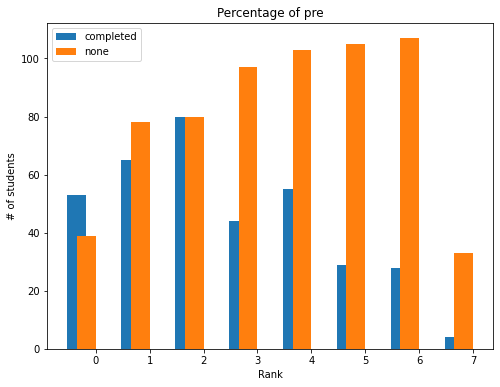

In [24]:
def plot_bar_chart(column):
    fig, ax = plt.subplots(figsize=(8,6))
    index_dict = dict()
    width = 0.35
    ind = np.arange(8)
    for idx in range(8):
        num = "class"+ str(idx)
        num = data[data["classification"]==rank.index[idx]]
        percentage_of_column = num[column].value_counts()
        percentage_of_column = percentage_of_column.sort_index()
        for key in percentage_of_column.index:
            if key not in index_dict.keys():
                index_dict[key] = []
                index_dict[key].append(percentage_of_column[key]) #/percentage_of_column.values.sum())
            else:
                index_dict[key].append(percentage_of_column[key]) #/percentage_of_column.values.sum())
   
    percentage_of_column = data[data["classification"]==rank.index[4]][column].value_counts().sort_index()
    for i in range(len(percentage_of_column.index)):
        rects = ax.bar(ind - width/(i+1), 
                       index_dict[percentage_of_column.index[i]],
                       width, label=percentage_of_column.index[i])

    ax.set_xlabel('Rank')
    ax.set_ylabel('# of students')
    ax.set_title("Percentage of " + column)
    ax.set_xticks(ind)
    ax.legend()
    plt.show()
    
plot_bar_chart("pre") 


Lebih dari 50% siswa di peringkat 0 menyelesaikan kursus persiapan ujian, dan biasanya ada sekitar 70~80% siswa di peringkat 7 yang belum menyelesaikan kursus. Dikatakan bahwa kursus persiapan dapat membantu siswa mendapatkan nilai yang lebih baik.

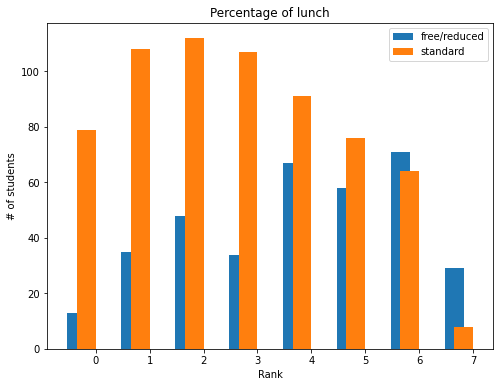

In [25]:
plot_bar_chart("lunch")

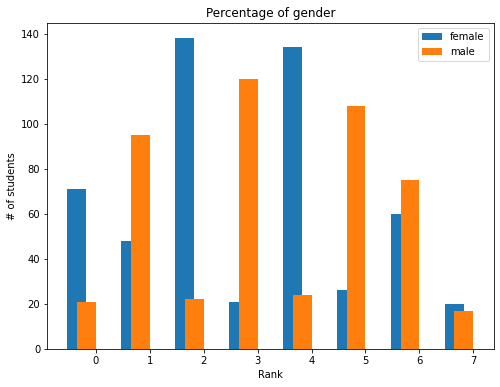

In [26]:
plot_bar_chart("gender")

**Kesimpulan**

Ada beberapa kesimpulan di bawah ini:

1.   Tingkat pendidikan orang tua dapat mempengaruhi kinerja siswa, tetapi bukan yang terpenting
2.   kursus/pretest sebelum ujian sangat bermanfaat
3.   Makan siang penting bagi siswa, dan juga yang paling signifikan.
4.   Jenis kelamin tidak memiliki korelasi dengan skor

Singkatnya, jika siswa ingin memiliki kinerja yang baik, mereka harus memiliki nutrisi yang cukup dan berusaha untuk mempersiapkan ujian.



